# ODE求解器：odeint，solve_ivp

In [ ]:
'''
odeint:

odeint(func, y0, t, args=())

parameters:
func:我们自行定义的需要求解的微分方程的函数
y0:求解的微分方程的初值
t:求解的微分方程中的自变量，应该是一个连续的序列值
args=():args 是一个元组（tuple），用于向微分方程函数 func 传递额外的参数。这些参数可以是常数、系数或其他需要在微分方程中使用的值

'''

# 马尔萨斯人口模型

In [40]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#定义马尔萨斯人口模型的微分方程
def malthusian_model(X,t,r):
    dXdt=r*X
    return dXdt

In [44]:
#定义初始条件和参数
X0=100    #初始人口数量
t=np.linspace(0,1000,1000)    #时间范围从0-1000产生1000个点
r=0.001    #人口增长率

In [46]:
#求解微分方程
X=odeint(malthusian_model,X0,t,args=(r,))

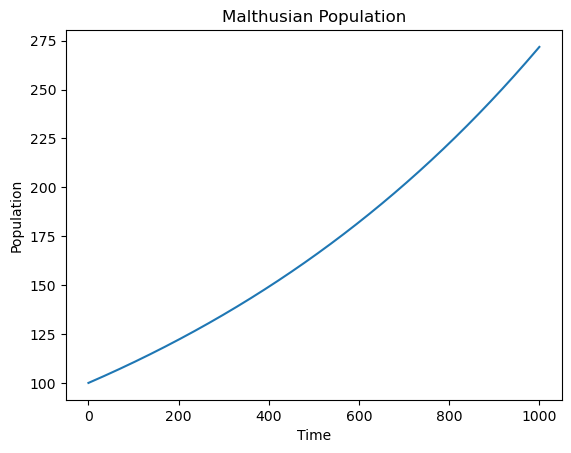

In [48]:
#绘制人口随时间变化的图像
plt.plot(t,X)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Malthusian Population')
plt.show()

# 阻滞增长模型

In [57]:
#人口增长率r不再是常数
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#定义函数
def logistic_growth_model(X,t,r,N):
    dXdt=r*X*(1-X/N)
    return dXdt

In [61]:
#初始值和参数
X0=100
t=np.linspace(0,1000,1000)
r=0.04
N=1000

In [63]:
#求解微分方程
X=odeint(logistic_growth_model,X0,t,args=(r,N))

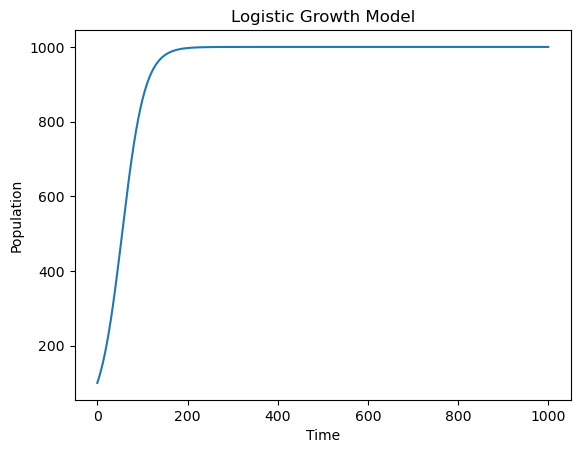

In [65]:
#绘制人口随时间变化的图像
plt.plot(t,X)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic Growth Model')
plt.show()

# 地中海鲨鱼问题
## Velterra（沃尔泰拉）模型

In [ ]:
'''

'''

In [97]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [99]:
#建立模型/函数
def Volterra_model(X,t,alpha,beta,delta,gamma,c):
    '''
    parameters:
    X:一维列表，包括食饵数量X1和捕食者数量X2  X=[X1,X2]
    X1:食饵数量
    X2:捕食者数量
    alpha:猎物增长率
    beta：捕食者对猎物影响系数
    delta：猎物对捕食者影响系数
    gamma：捕食者死亡率
    c：捕捞强度

    返回：
    猎物的增长函数
    捕食者的增长函数
    '''
    X1,X2=X   #从参数X中获取变量
    dX1dt=alpha*X1-beta*X1*X2-c*X1
    dX2dt=delta*X1*X2-gamma*X2-c*X2
    return [dX1dt,dX2dt]
    

In [126]:
#初始值和参数
X10=25
X20=2
t=np.linspace(0,20,200)
alpha=1.0
beta=0.1
delta=0.02
gamma=0.5
c=0.3
X0=[X10,X20]

In [128]:
#求解微分方程
sol=odeint(Volterra_model,X0,t,args=(alpha,beta,delta,gamma,c))
#返回的X1和X2的顺序与参数中的X0有关
X1=sol[:,0]  #猎物的序列，在sol的第一列
X2=sol[:,1]  #捕食者的序列，在sol的第二列

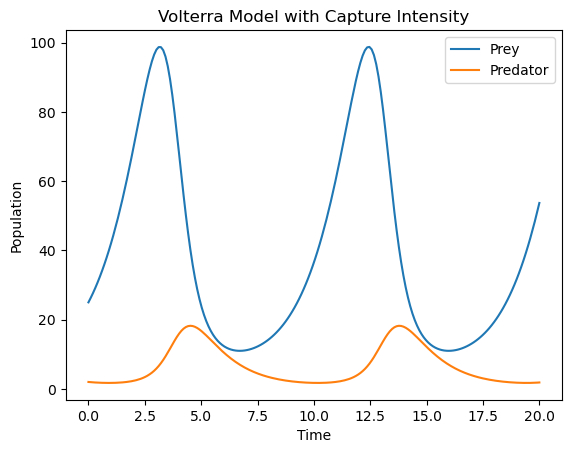

In [130]:
#绘制图像
# 绘制猎物种群数量随时间的变化
plt.plot(t, X1, label='Prey')

# 绘制捕食者种群数量随时间的变化
plt.plot(t, X2, label='Predator')

# 设置 x 轴标签
plt.xlabel('Time')

# 设置 y 轴标签
plt.ylabel('Population')

# 设置图表标题
plt.title('Volterra Model with Capture Intensity')

# 显示图例
plt.legend()

# 显示图表
plt.show()

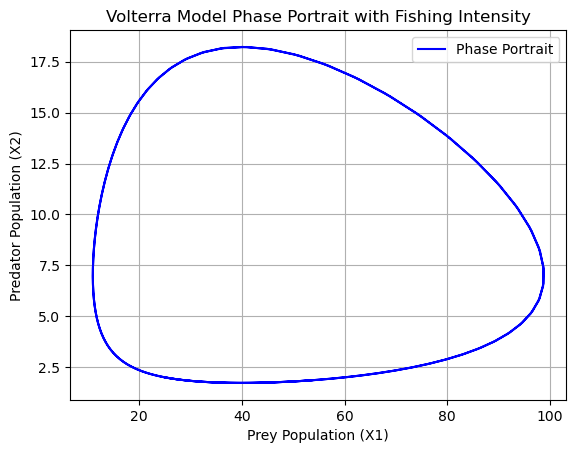

In [133]:
#相轨线图的绘制

# 绘制相轨线图
plt.plot(X1, X2, label='Phase Portrait', color='blue')

# 设置标题和标签
plt.xlabel('Prey Population (X1)')
plt.ylabel('Predator Population (X2)')
plt.title('Volterra Model Phase Portrait with Fishing Intensity')

# 添加网格
plt.grid(True)

# 显示图例
plt.legend()

# 显示图表
plt.show()